In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()
sns.set_style("whitegrid")
sns.set_context('paper', rc={"font.size":12,
                             "axes.titlesize":12,
                             "axes.labelsize":12,
                             "xtick.labelsize":10,
                             "ytick.labelsize":10,
                             "legend.fontsize":10})

files = ['./stats_exp_interp_w_noise.pkl.noaggregate',
         './stats_exp_extrap_w_noise.pkl.noaggregate']
cases = ['Toy-Interpolation',
         'Toy-Extrapolation']
# mismatches = ['local',
#               'local',
#               'global',
#               'global']

dfs = []
for file, case in zip(files, cases):
    df = pd.read_pickle(file)
    df['case'] = case
#     df['mismatch'] = mismatch
    print(df.head())
    dfs.append(df)

dfall = pd.concat(dfs, axis=0, ignore_index=True)

df = dfall.melt(id_vars=['algo', 'repetition', 'output_dim', 'case'], var_name='metric')
#df = dfall

algo_groups = dict()
algo_groups['model-only'] = ['LLS', 'SVR']
algo_groups['model-free-only'] = ['GP', 'BNN']
algo_groups['sequential semi-parametric'] = ['LLS-GP', 'it-LLS-GP', 'SVR-GP', 'it-SVR-GP', 'LLS-BNN', 'it-LLS-BNN', 'SVR-BNN', 'it-SVR-BNN']
algo_groups['joint semi-parametric'] = ['SPGP', 'BaMbANN']

group_order = ['model-only', 'model-free-only', 'sequential semi-parametric', 'joint semi-parametric']

full_algo_order = []
for i, group in enumerate(group_order):
    for algo in algo_groups[group]:
        full_algo_order.append(algo)

  algo  repetition  output_dim      rmse      nllh               case
0  BNN           0           0  0.950843  2.303661  Toy-Interpolation
1  BNN           1           0  0.974718  2.520639  Toy-Interpolation
2  BNN           2           0  0.950061  2.835960  Toy-Interpolation
3  BNN           3           0  0.945918  3.107084  Toy-Interpolation
4  BNN           4           0  0.990105  2.913012  Toy-Interpolation
  algo  repetition  output_dim      rmse       nllh               case
0  BNN           0           0  4.810086  17.107770  Toy-Extrapolation
1  BNN           1           0  4.663202  21.280992  Toy-Extrapolation
2  BNN           2           0  6.780467  28.045603  Toy-Extrapolation
3  BNN           3           0  5.000855  16.806991  Toy-Extrapolation
4  BNN           4           0  6.782635  29.193151  Toy-Extrapolation


In [13]:
dfplot = df.groupby('metric').get_group('rmse').groupby('case').get_group('Toy-Extrapolation')
dfplot.sort_values(by='value')

algo  repetition  output_dim               case metric      value
114     SVR-BNN           4           0  Toy-Extrapolation   rmse   0.605766
117      SVR-GP           2           0  Toy-Extrapolation   rmse   0.685078
115      SVR-GP           0           0  Toy-Extrapolation   rmse   0.685078
116      SVR-GP           1           0  Toy-Extrapolation   rmse   0.685078
118      SVR-GP           3           0  Toy-Extrapolation   rmse   0.685078
119      SVR-GP           4           0  Toy-Extrapolation   rmse   0.685078
107         SVR           2           0  Toy-Extrapolation   rmse   0.699992
109         SVR           4           0  Toy-Extrapolation   rmse   0.699992
105         SVR           0           0  Toy-Extrapolation   rmse   0.699992
106         SVR           1           0  Toy-Extrapolation   rmse   0.699992
108         SVR           3           0  Toy-Extrapolation   rmse   0.699992
124  it-LLS-BNN           4           0  Toy-Extrapolation   rmse   0.715961
121  it-LLS-BNN           1           0  Toy-Extrapolation   rmse   0.720572
139   it-SVR-GP           4           0  Toy-Extrapolation   rmse   0.734664
137   it-SVR-GP           2           0  Toy-Extrapolation   rmse   0.734664
138   it-SVR-GP           3           0  Toy-Extrapolation   rmse   0.734664
135   it-SVR-GP           0           0  Toy-Extrapolation   rmse   0.734664
136   it-SVR-GP           1           0  Toy-Extrapolation   rmse   0.734664
113     SVR-BNN           3           0  Toy-Extrapolation   rmse   0.787139
133  it-SVR-BNN           3           0  Toy-Extrapolation   rmse   0.791991
131  it-SVR-BNN           1           0  Toy-Extrapolation   rmse   0.845173
120  it-LLS-BNN           0           0  Toy-Extrapolation   rmse   0.883059
110     SVR-BNN           0           0  Toy-Extrapolation   rmse   0.892695
130  it-SVR-BNN           0           0  Toy-Extrapolation   rmse   0.893049
111     SVR-BNN           1           0  Toy-Extrapolation   rmse   0.918130
132  it-SVR-BNN           2           0  Toy-Extrapolation   rmse   0.925152
90      LLS-BNN           0           0  Toy-Extrapolation   rmse   1.067764
123  it-LLS-BNN           3           0  Toy-Extrapolation   rmse   1.130690
134  it-SVR-BNN           4           0  Toy-Extrapolation   rmse   1.150602
102        SPGP           2           0  Toy-Extrapolation   rmse   1.209510
..          ...         ...         ...                ...    ...        ...
127   it-LLS-GP           2           0  Toy-Extrapolation   rmse   1.552300
98       LLS-GP           3           0  Toy-Extrapolation   rmse   1.565627
95       LLS-GP           0           0  Toy-Extrapolation   rmse   1.565627
99       LLS-GP           4           0  Toy-Extrapolation   rmse   1.565627
96       LLS-GP           1           0  Toy-Extrapolation   rmse   1.565627
97       LLS-GP           2           0  Toy-Extrapolation   rmse   1.565627
92      LLS-BNN           2           0  Toy-Extrapolation   rmse   1.624598
88          LLS           3           0  Toy-Extrapolation   rmse   1.631717
87          LLS           2           0  Toy-Extrapolation   rmse   1.631717
86          LLS           1           0  Toy-Extrapolation   rmse   1.631717
85          LLS           0           0  Toy-Extrapolation   rmse   1.631717
89          LLS           4           0  Toy-Extrapolation   rmse   1.631717
78      BaMbANN           3           0  Toy-Extrapolation   rmse   2.097520
79      BaMbANN           4           0  Toy-Extrapolation   rmse   2.689526
91      LLS-BNN           1           0  Toy-Extrapolation   rmse   2.781747
93      LLS-BNN           3           0  Toy-Extrapolation   rmse   2.886423
77      BaMbANN           2           0  Toy-Extrapolation   rmse   3.081067
122  it-LLS-BNN           2           0  Toy-Extrapolation   rmse   3.209289
71          BNN           1           0  Toy-Extrapolation   rmse   4.663202
70          BNN           0           0  Toy-Extrapolation   rmse   4.810086
73     

<class 'seaborn.axisgrid.FacetGrid'>


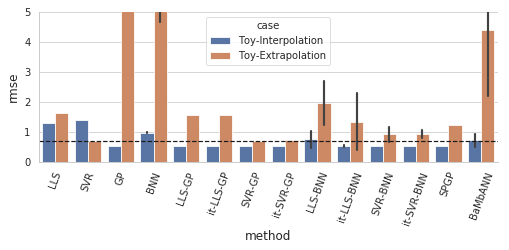

In [14]:
dfplot = df.groupby('metric').get_group('rmse')
g = sns.catplot(x='algo', y='value', hue='case', data=dfplot,
                height=3, aspect=2.5, ci='sd', kind='bar', sharey=False,
                order=full_algo_order, legend_out=False)
print (type(g))
df.groupby('metric').get_group('rmse')
#g.set_xticklabels(rotation=70)
for ax in g.axes.flat:
    ax.set_ylim(0.0, 5.0)
    ax.set_ylabel('rmse')
    ax.set_xlabel('method')
    ax.axhline(y=0.685078, color='k', linestyle='--')
    for label in ax.get_xticklabels():
        label.set_rotation(70)
    #ax.tick_params(labelsize=14)
    #ax.legend_params(labelsize=14)

        
plt.savefig('../images-src/bar_plot_toy_rmse.svg', bbox_inches = "tight")

/home/sebastian/software/conda37/envs/plotting/lib/python3.7/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


<class 'seaborn.axisgrid.FacetGrid'>


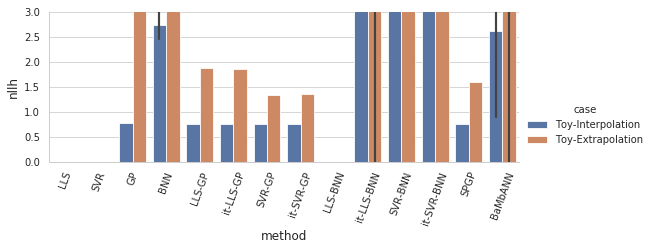

In [15]:
dfplot = df.groupby('metric').get_group('nllh')
g = sns.catplot(x='algo', y='value', hue='case', data=dfplot,
                height=3, aspect=2.5, ci='sd', kind='bar', sharey=False,
                order=full_algo_order)
print (type(g))
df.groupby('metric').get_group('rmse')
#g.set_xticklabels(rotation=70)
for ax in g.axes.flat:
    ax.set_ylim(0.0, 3.0)
    ax.set_ylabel('nllh')
    ax.set_xlabel('method')
    #ax.axhline(y=0.685078, color='k', linestyle='--')
    for label in ax.get_xticklabels():
        label.set_rotation(70)
        
plt.savefig('../images-src/bar_plot_toy_nllh.svg', bbox_inches = "tight")